In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fish = pd.read_csv('/kaggle/input/fish123456/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
#pairplot
fish1 = fish[fish['Species'].isin(['Bream', 'Perch', 'Pike'])]
fish1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Figure size 1100x900 with 0 Axes>

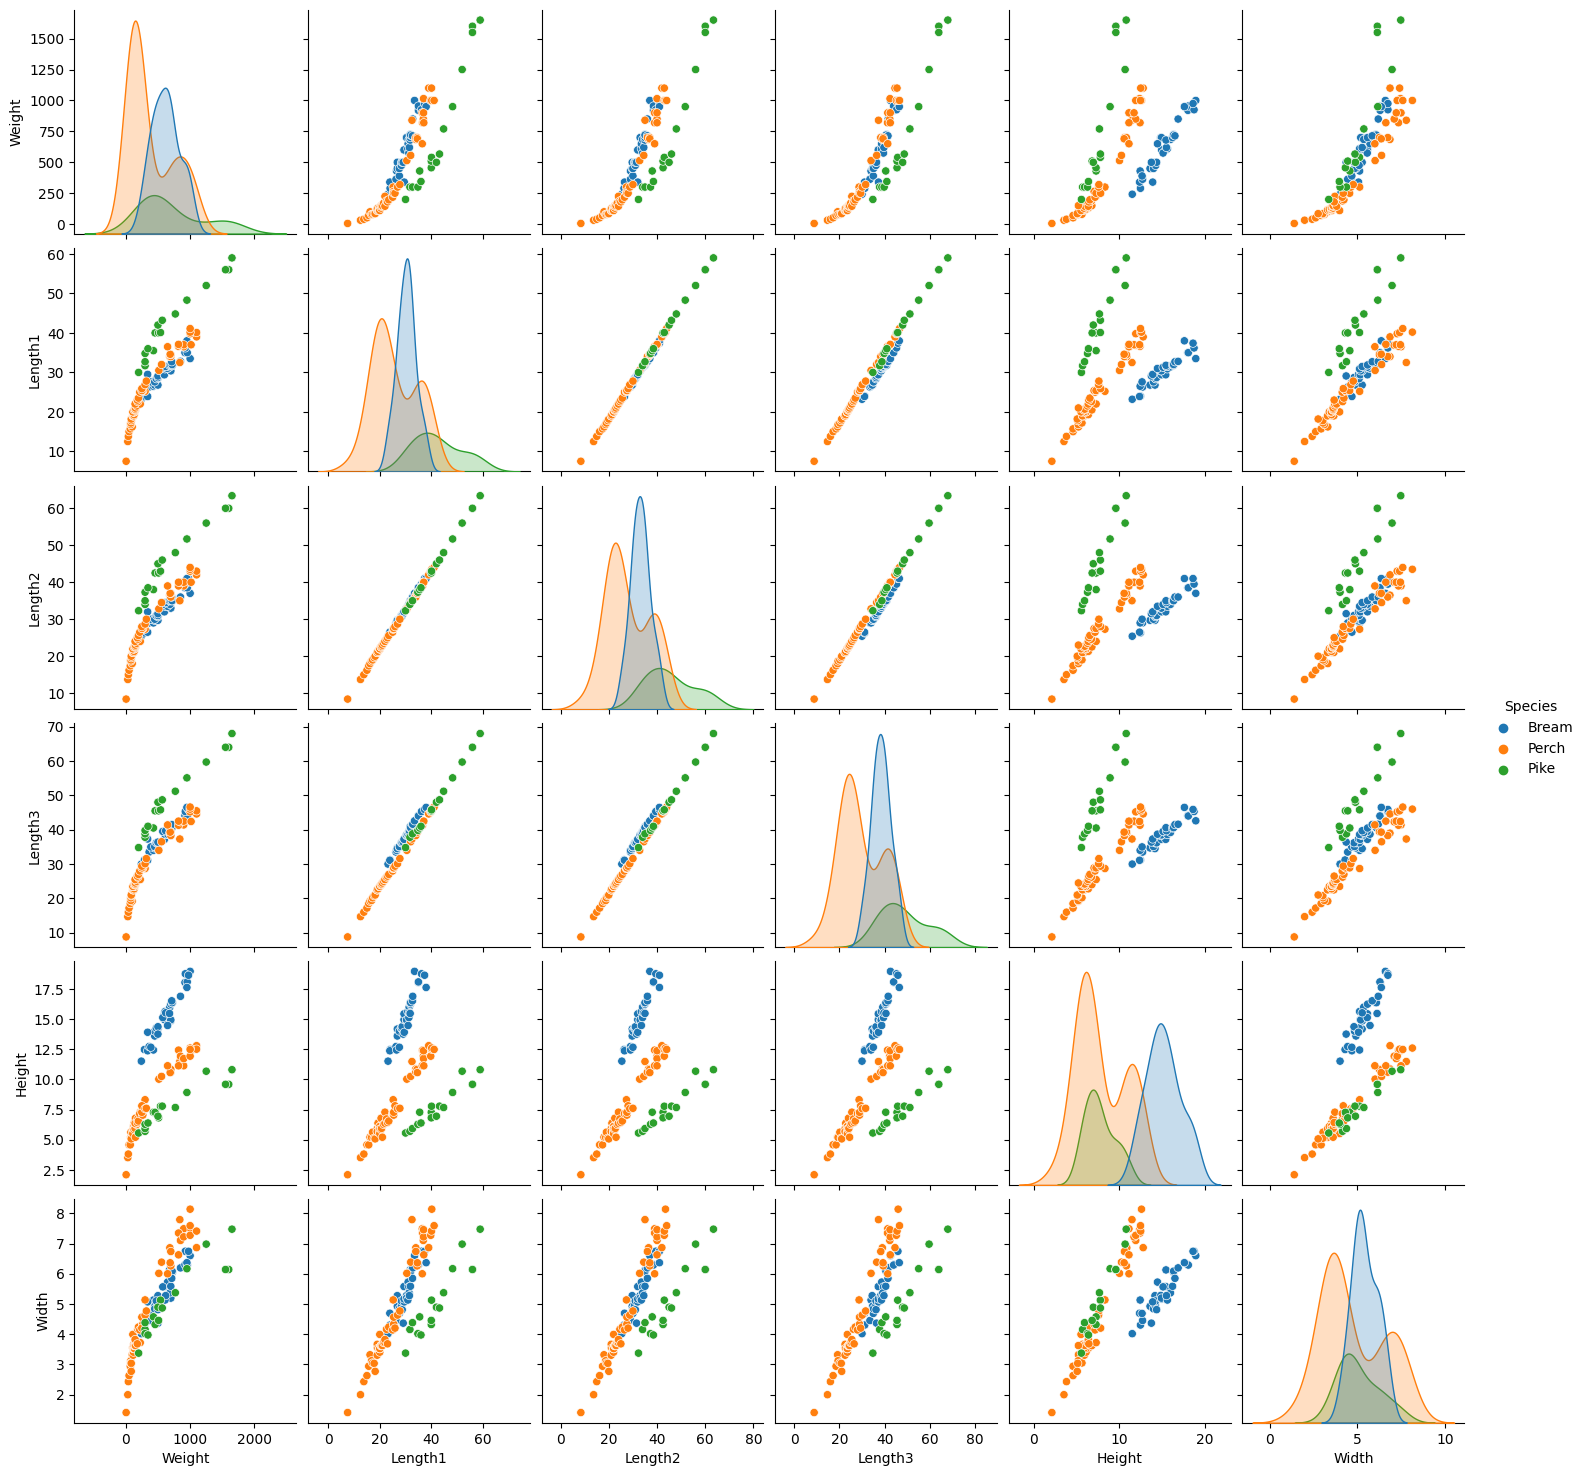

In [4]:
plt.figure(figsize = (11, 9))
sns.pairplot(fish1, hue = 'Species')
plt.show()

[]

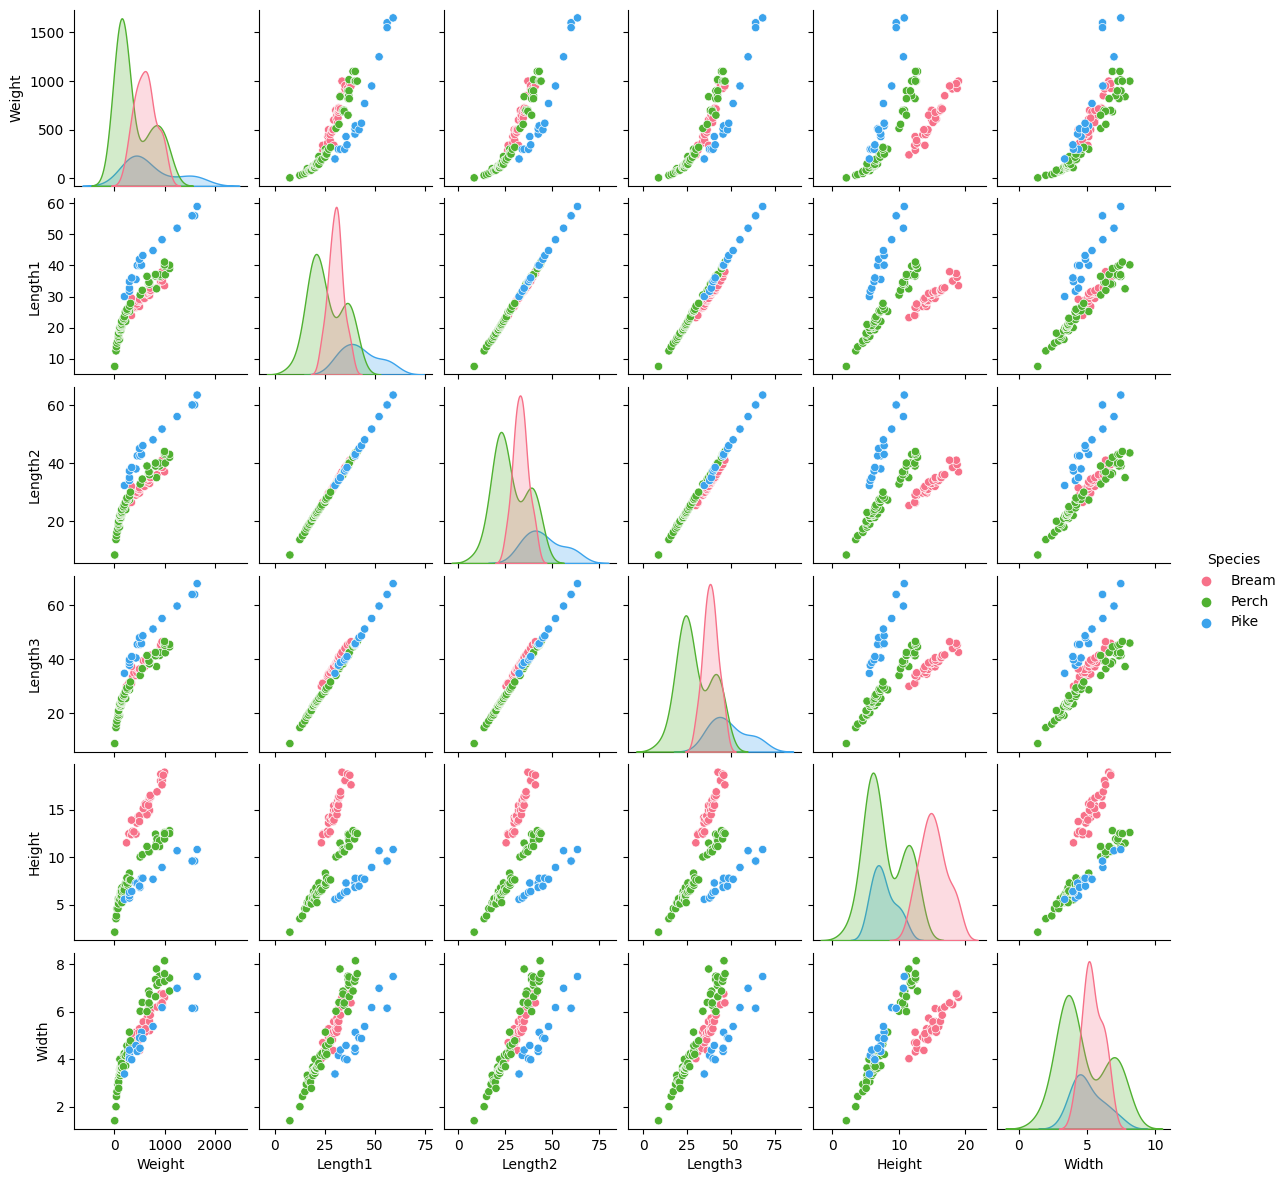

In [5]:
sns.pairplot(fish1, hue = 'Species', palette = 'husl', size = 2)
plt.plot()

In [6]:
#marker kullanarak renkleri şekiller yardımıyla birbirinden ayırt edebiliriz.

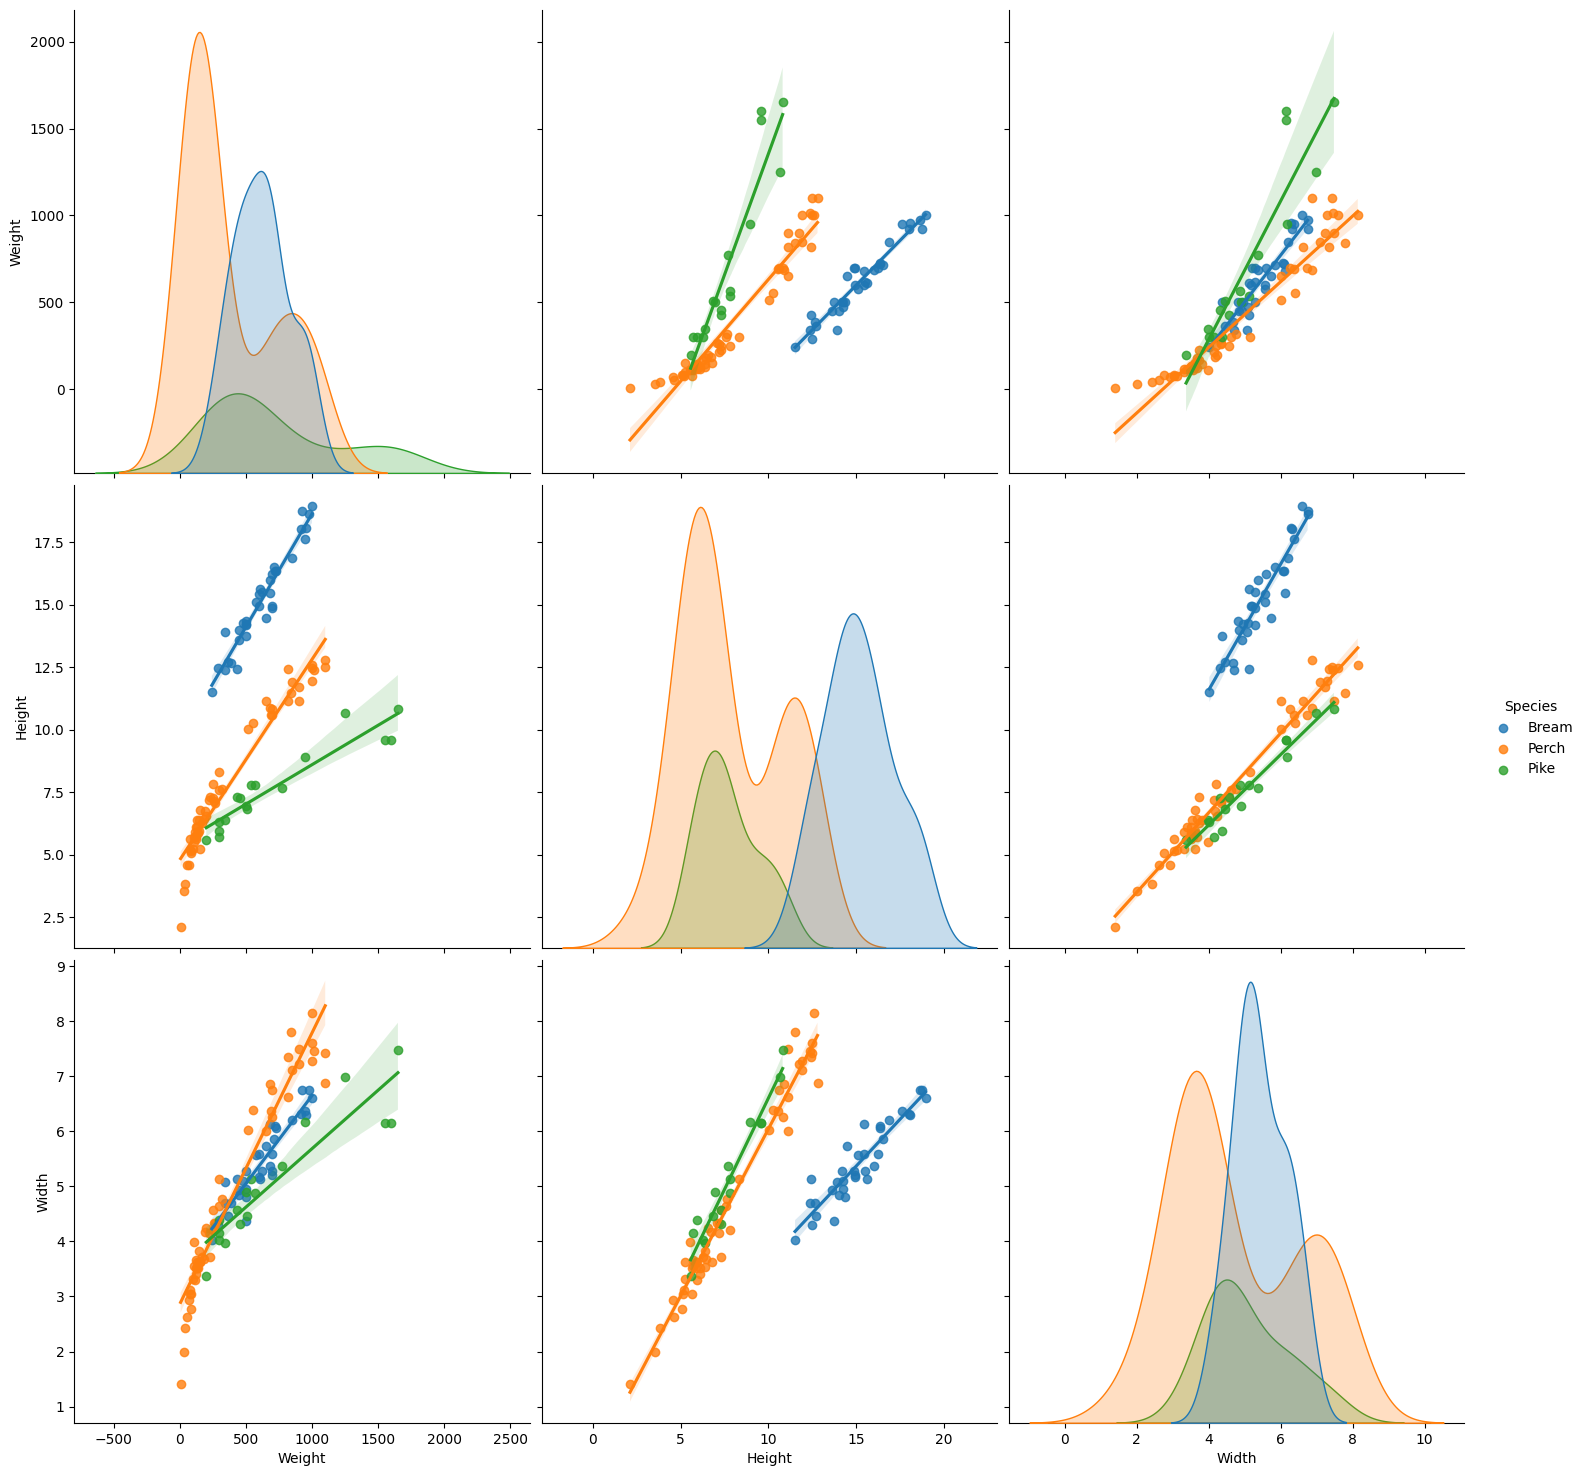

In [7]:
sns.pairplot(fish1, hue = 'Species', vars = ['Weight', 'Height', 'Width'], kind = 'reg', height = 5, aspect = 1)
plt.show()

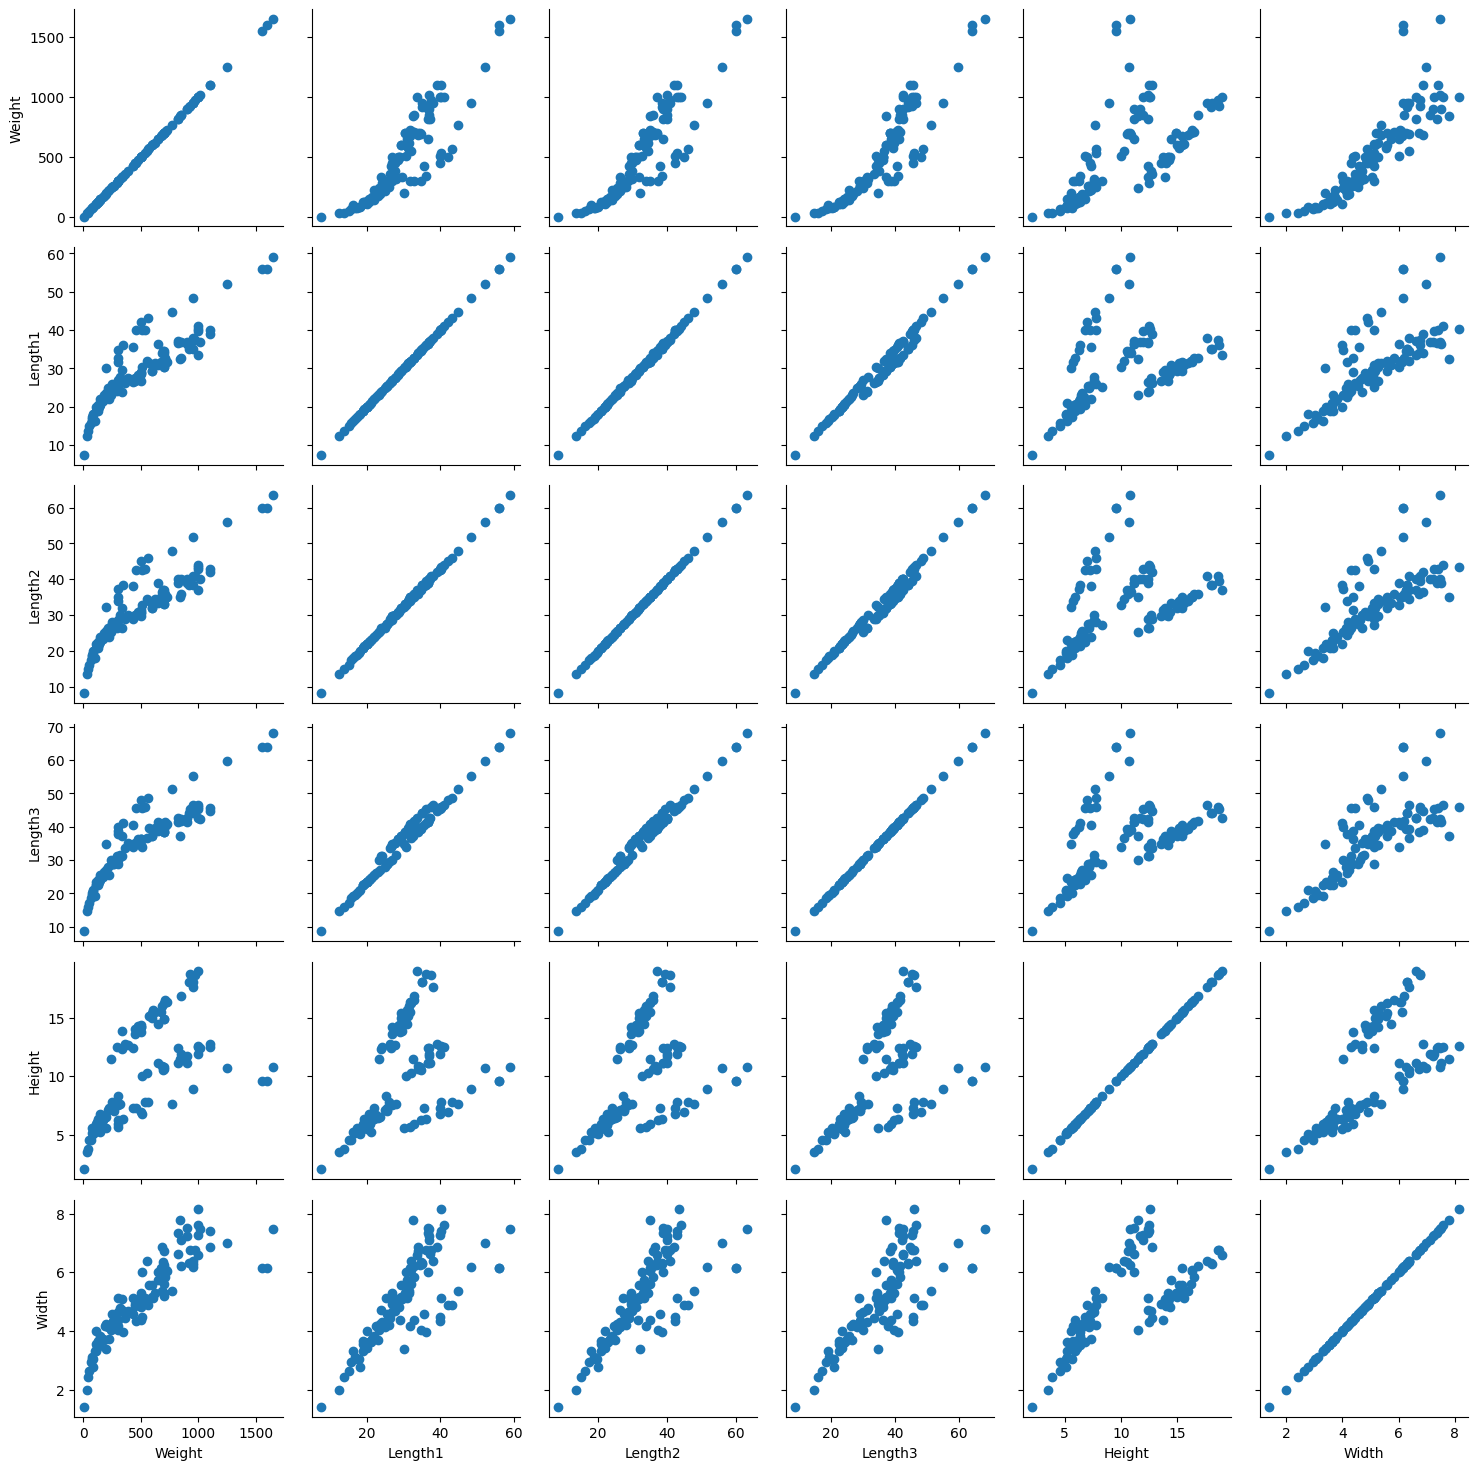

In [8]:
#pairgrid
g = sns.PairGrid(fish1)
g = g.map(plt.scatter)
plt.show()

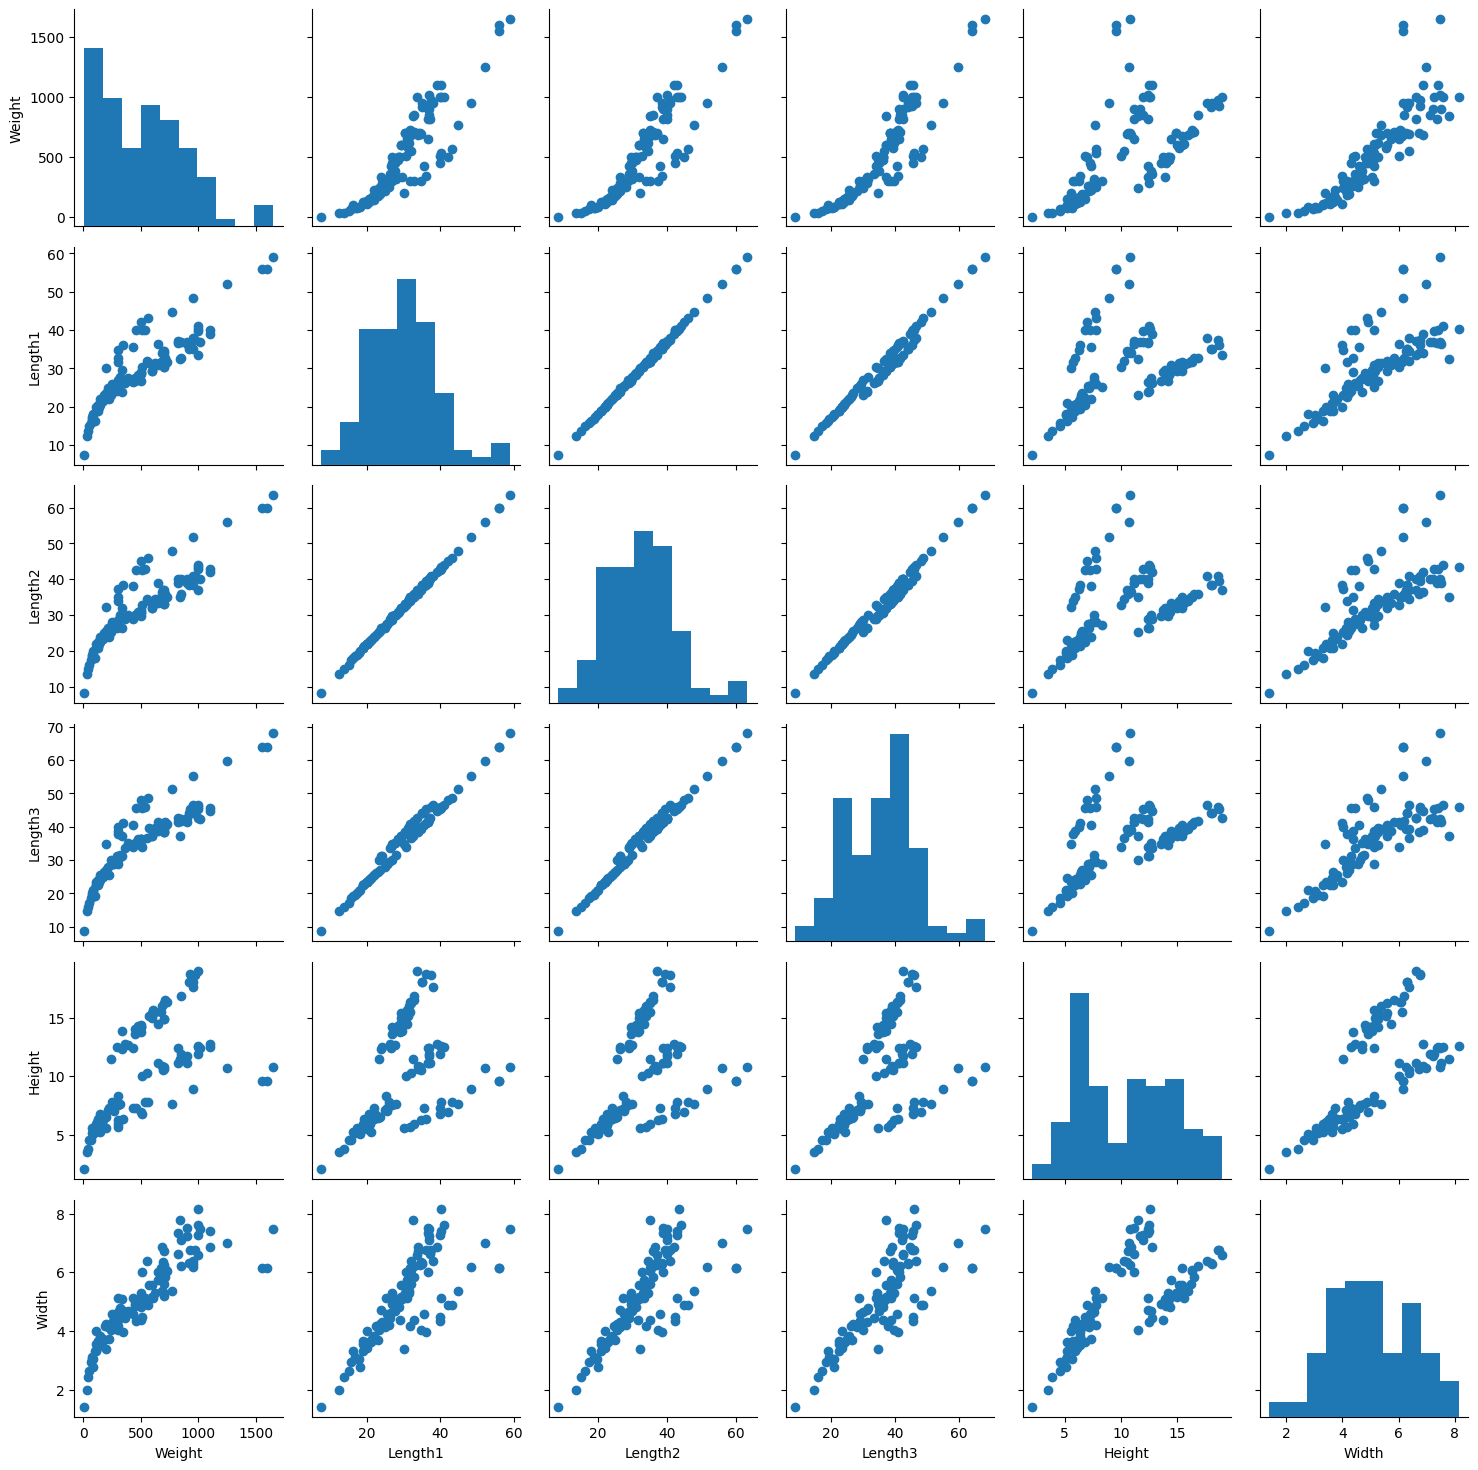

In [9]:
g = sns.PairGrid(fish1)
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
plt.show()

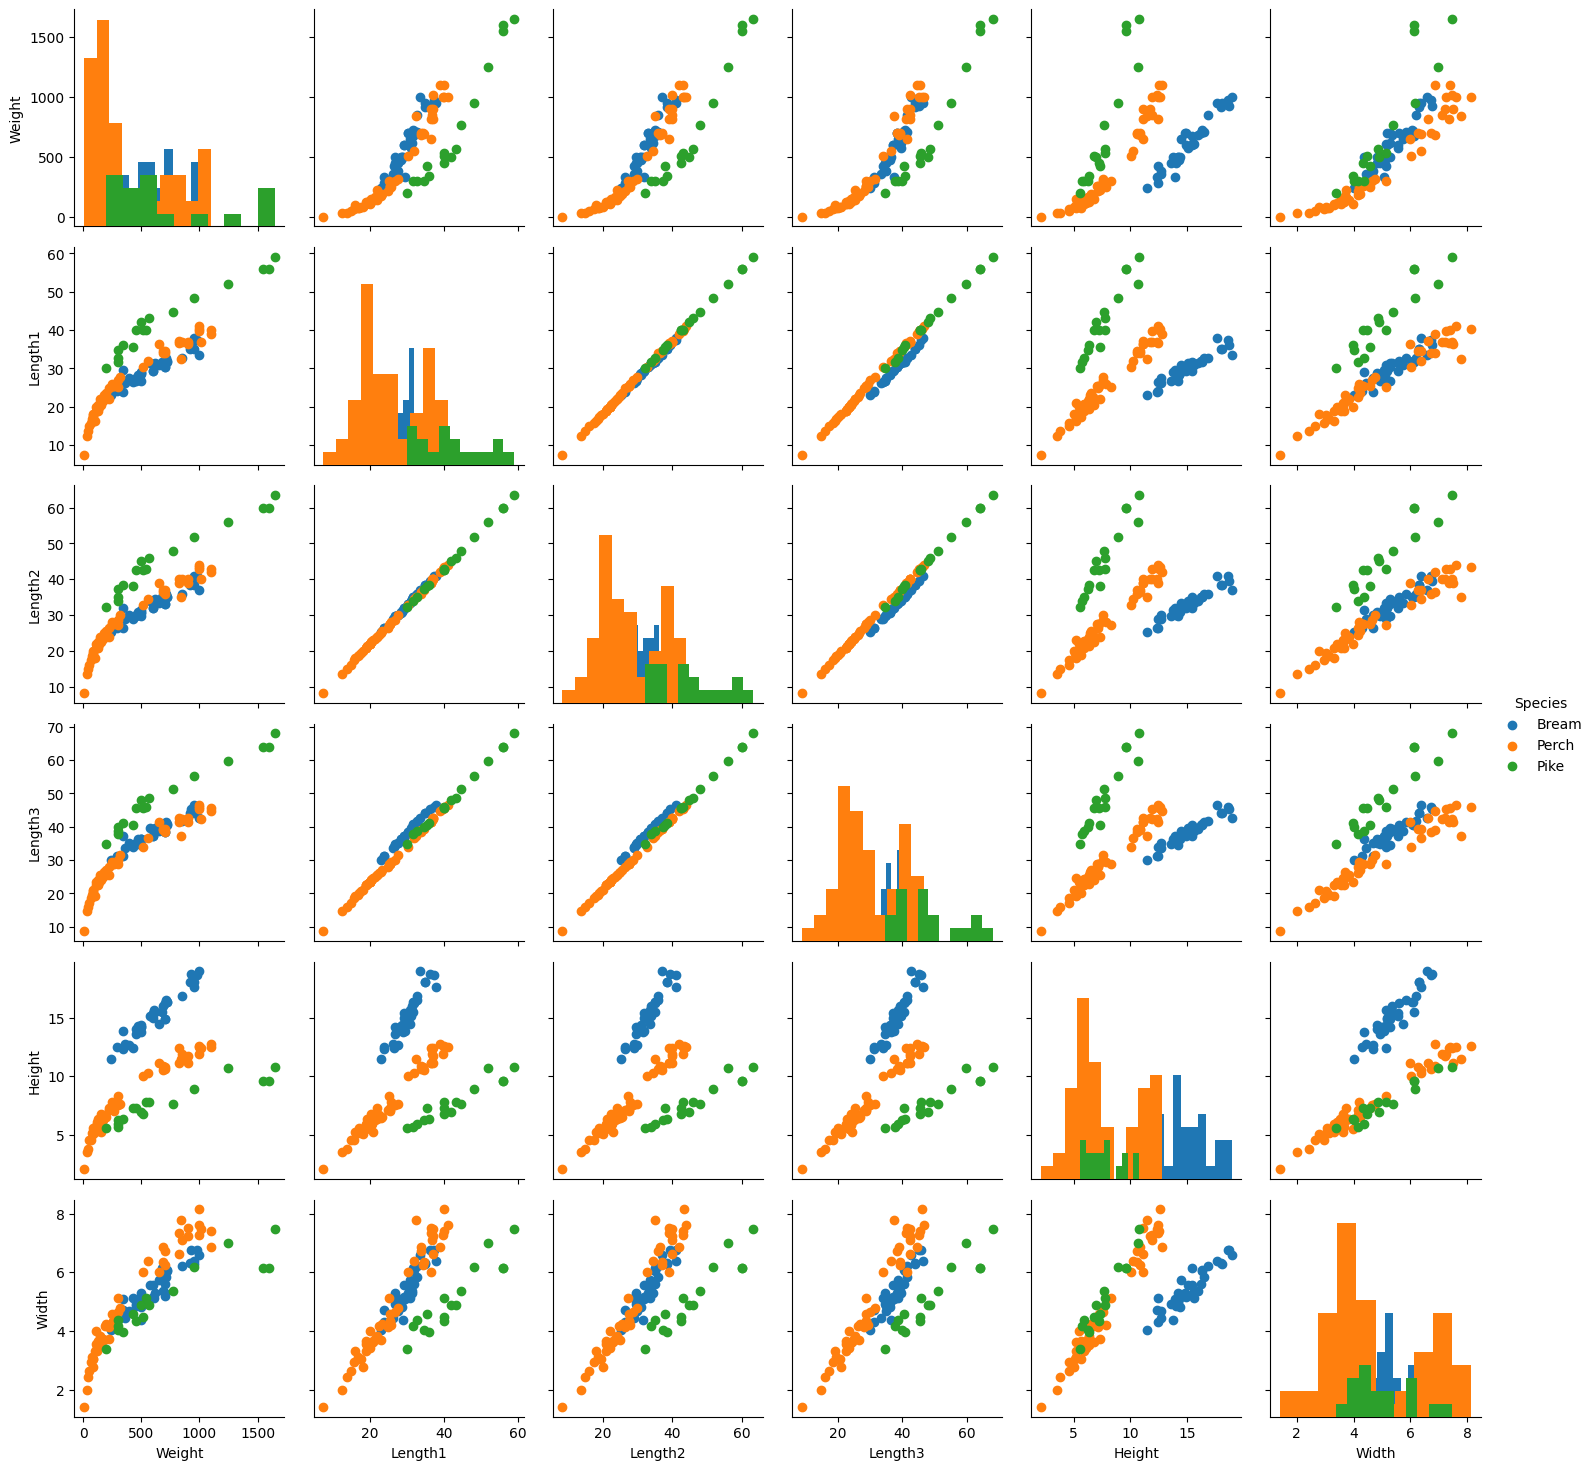

In [10]:
g = sns.PairGrid(fish1, hue = 'Species')
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
g = g.add_legend()
plt.show()

In [11]:
#heatmap
canada = pd.read_csv('/kaggle/input/canad12/canada1.csv', delimiter = ';')
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


In [12]:
canada = canada.drop(columns = ['AREA', 'DEV', 'DevName', 'REG', 'Type', 'Coverage', 'AreaName', 'RegName'])
canada.head()

,OdName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
4,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [13]:
canada.rename(columns = {'OdName' : 'Country'}, inplace = True)
canada.set_index(canada.Country, inplace = True)
canada.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [14]:
canada.index.name = None
canada.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,Angola,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45


In [15]:
del canada['Country']
canada.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,1,3,6,6,4,3,5,5,11,6,...,268,295,184,106,76,62,61,39,70,45


In [16]:
canada = canada.transpose()
canada.head()

,Afghanistan,Albania,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Unknown
1980,16,1,0,0,1,0,368,0,702,234,...,128,0,0,103,1191,0,1,11,72,44000
1981,39,0,1,0,3,0,426,0,639,238,...,132,0,0,117,1829,0,2,17,114,18078
1982,39,0,0,0,6,0,626,0,484,201,...,146,0,0,174,2162,0,1,11,102,16904
1983,47,0,0,0,6,0,241,0,317,117,...,105,0,0,124,3404,0,6,7,44,13635
1984,71,0,0,0,4,42,237,0,317,127,...,90,0,0,142,7583,0,0,16,32,14855


In [18]:
canada1 = canada.loc['2004':, ['Argentina', 'Australia', 'Viet Nam', 'Uruguay', 'China', 'Afghanistan', 'Austria', 'Venezuela (Bolivarian Republic of)', 'Zimbabwe', 'Turkey']]
canada1.head()

,Argentina,Australia,Viet Nam,Uruguay,China,Afghanistan,Austria,Venezuela (Bolivarian Republic of),Zimbabwe,Turkey
2004,1591,930,1816,130,536,2978,118,1224,1450,1736
2005,1153,909,1852,217,729,3436,122,1211,615,2065
2006,847,875,3153,175,712,3009,102,1192,454,1638
2007,620,1033,2574,147,674,2652,98,1335,663,1463
2008,540,1018,1784,160,897,2111,91,1239,611,1122


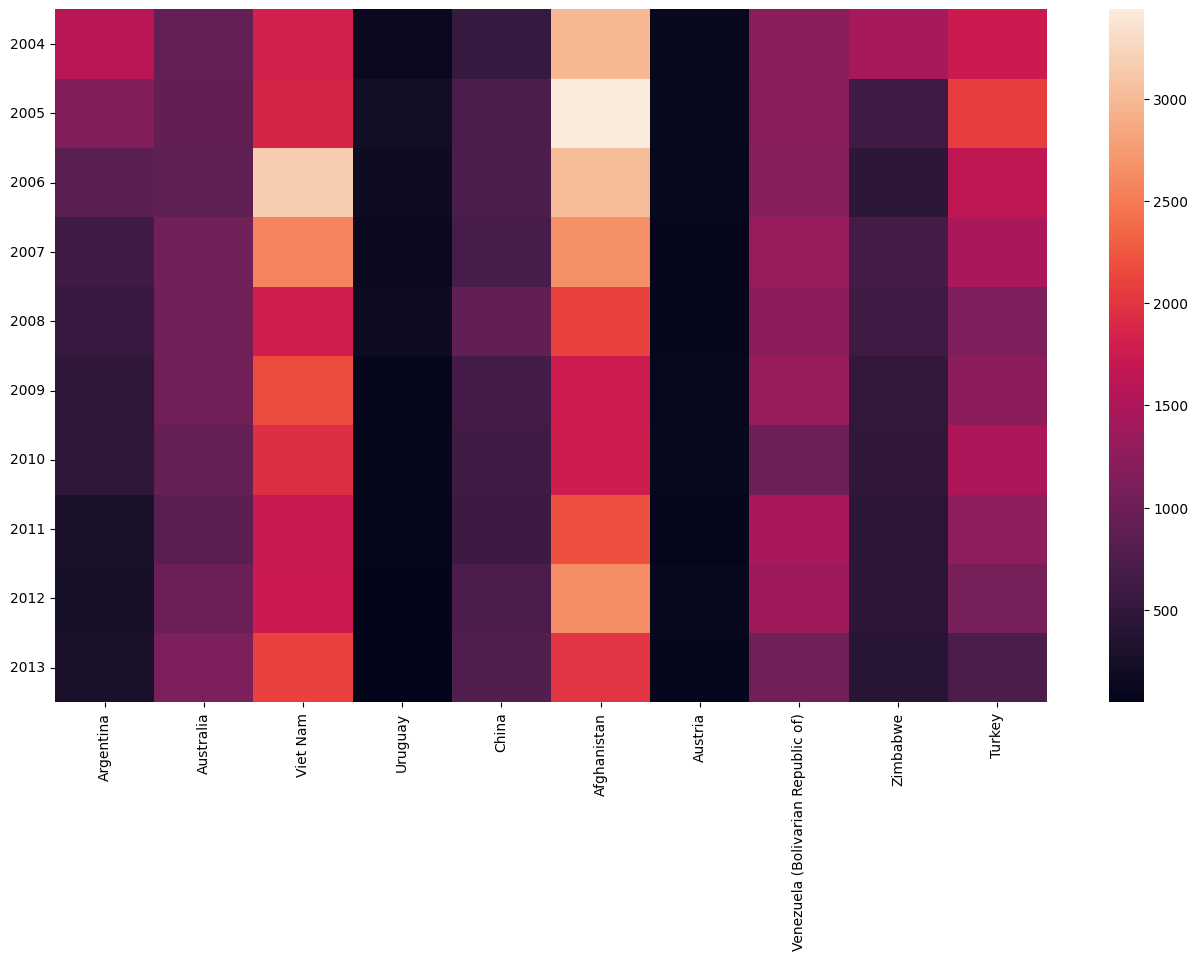

In [22]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1)
plt.yticks(rotation = 0)
plt.show()

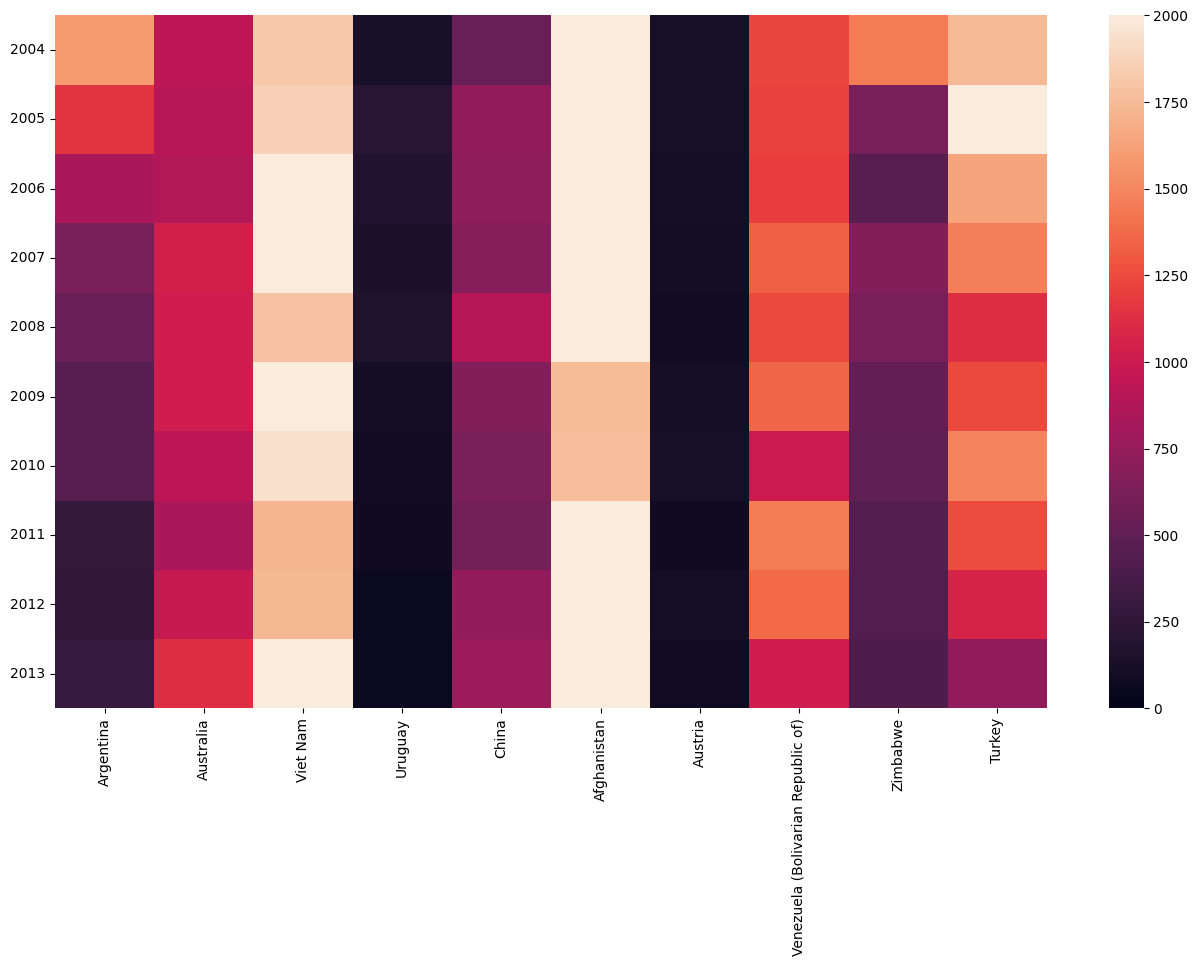

In [26]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, vmin = 0, vmax = 2000)
plt.yticks(rotation = 0)
plt.show()

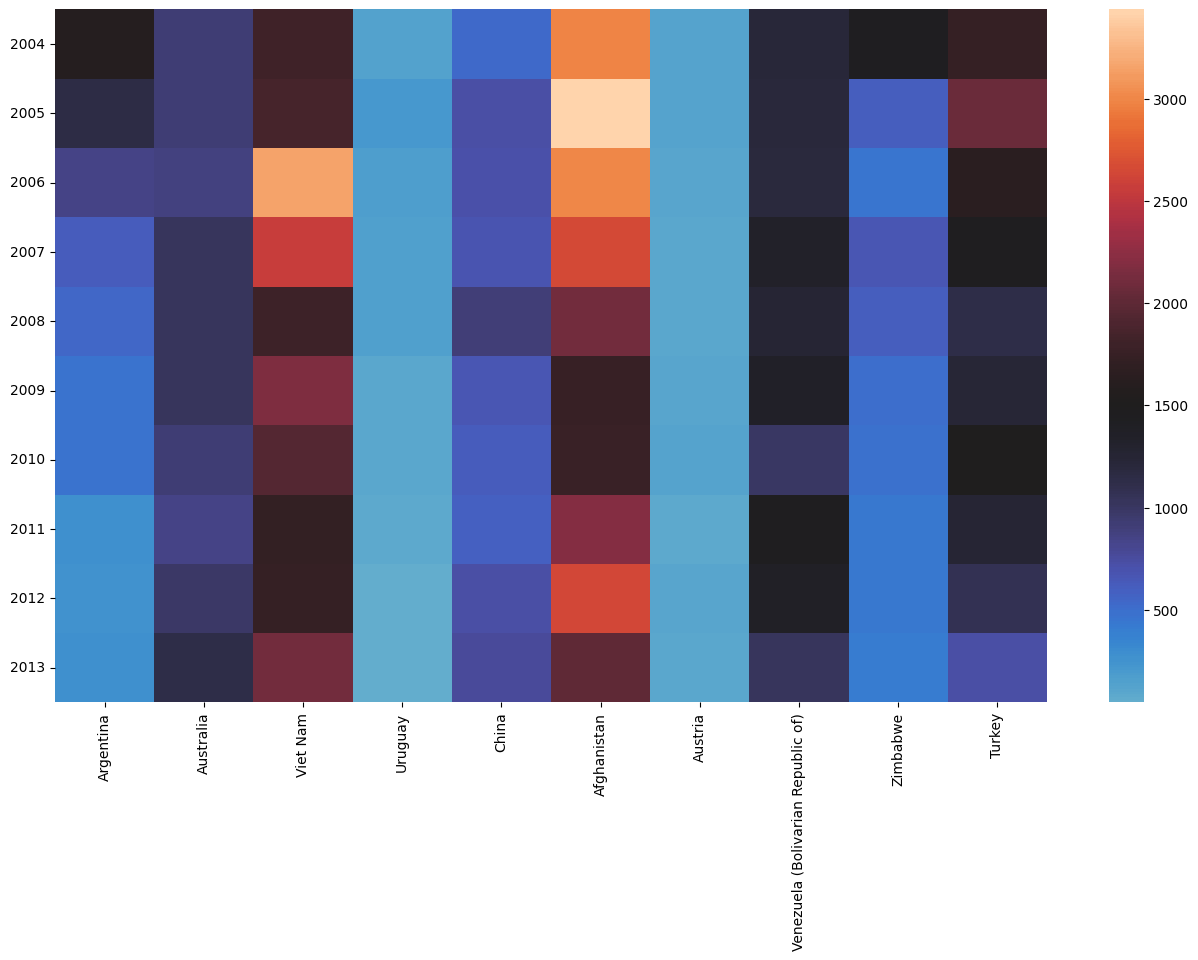

In [27]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, center = 1500)
plt.yticks(rotation = 0)
plt.show()

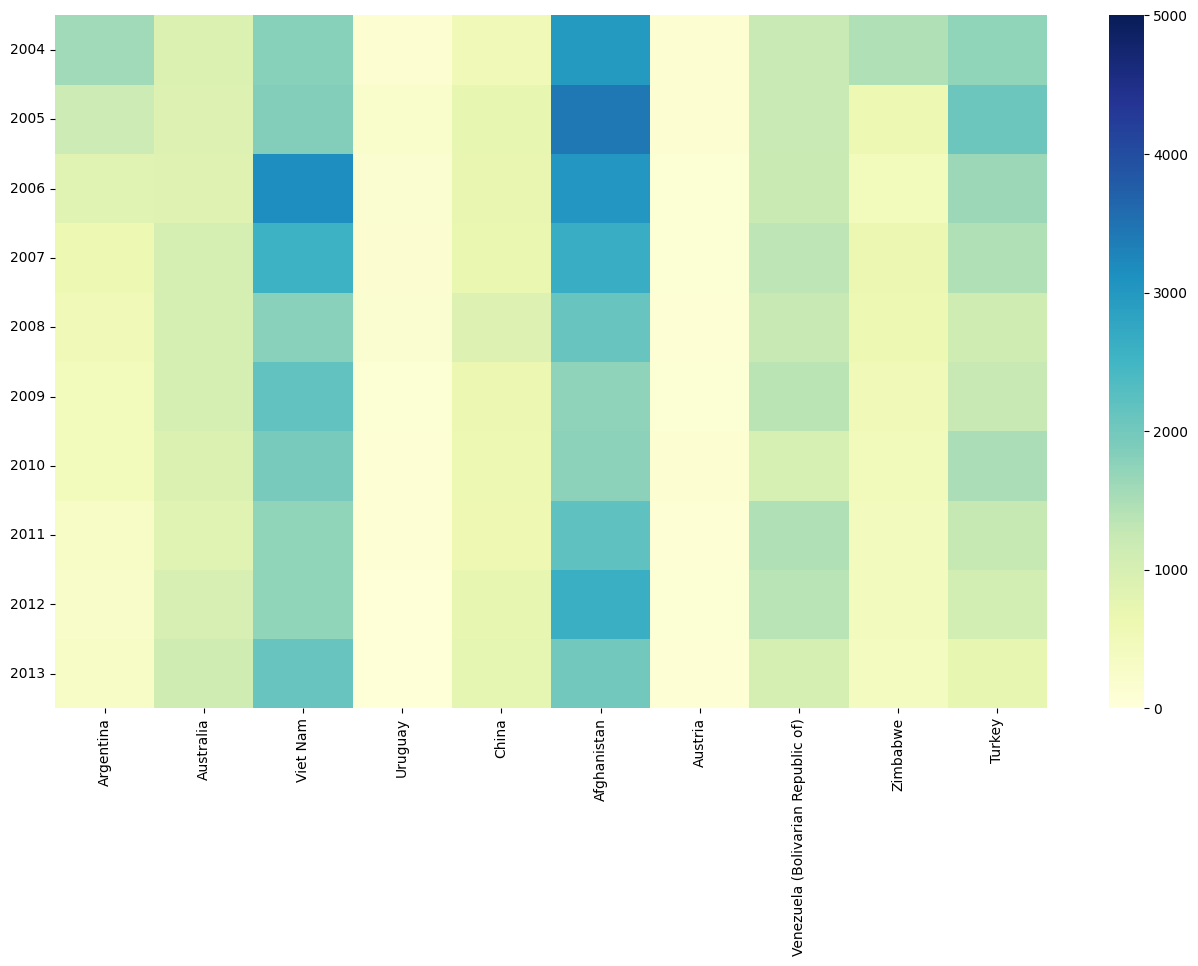

In [28]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, vmin = 0, vmax = 5000, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.show()

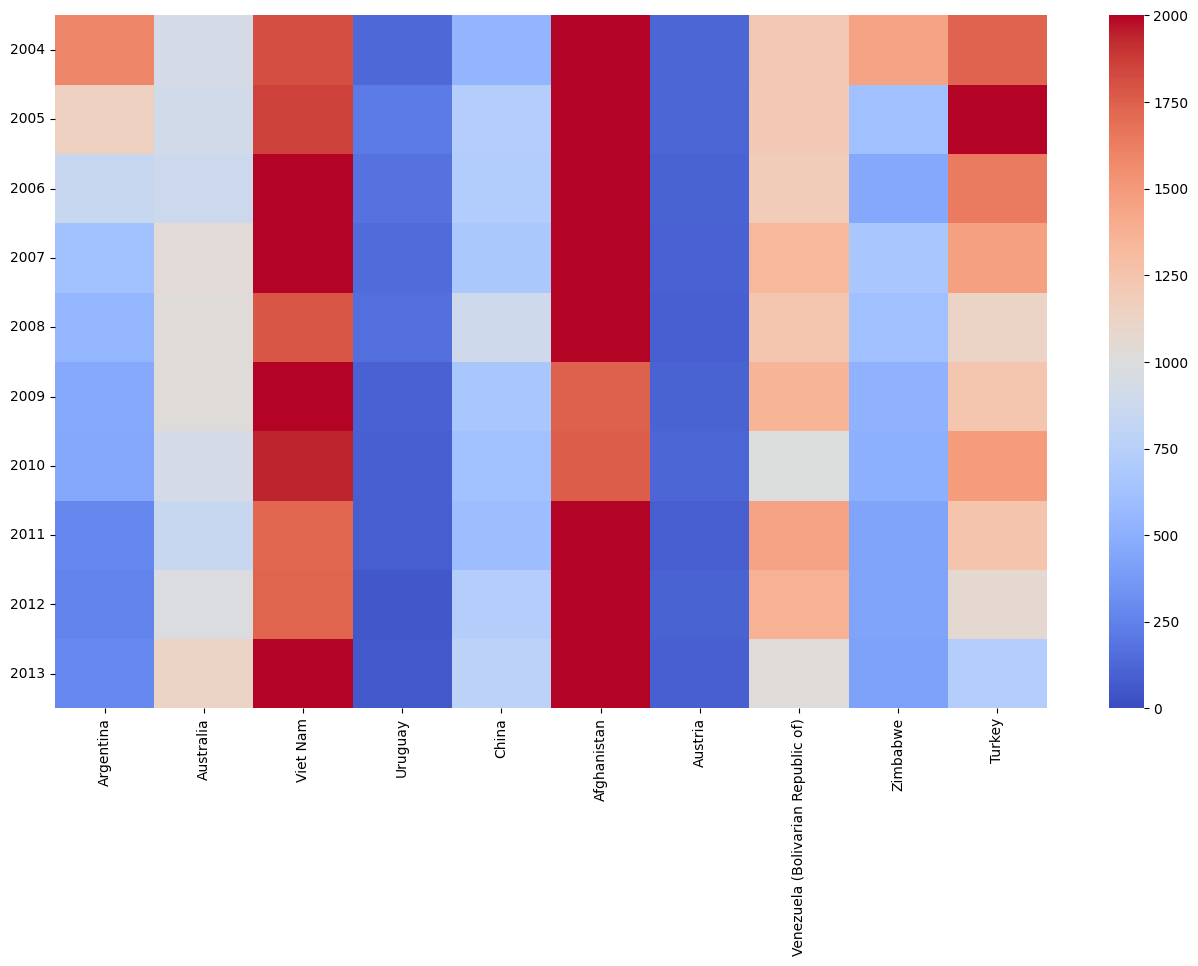

In [30]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, vmin = 0, vmax = 2000, cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.show()

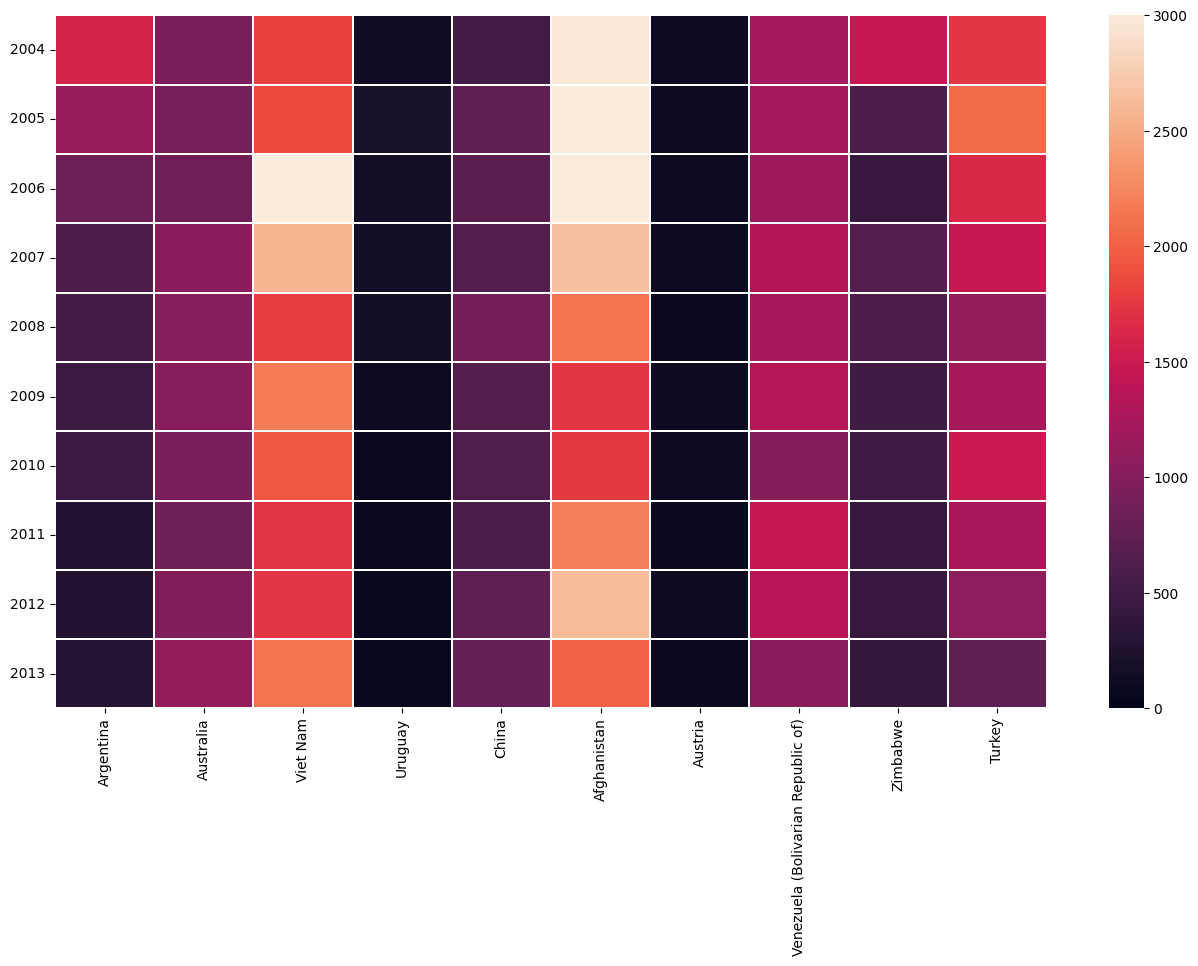

In [32]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, vmin = 0, vmax = 3000, linewidths = .1)
plt.yticks(rotation = 0)
plt.show()

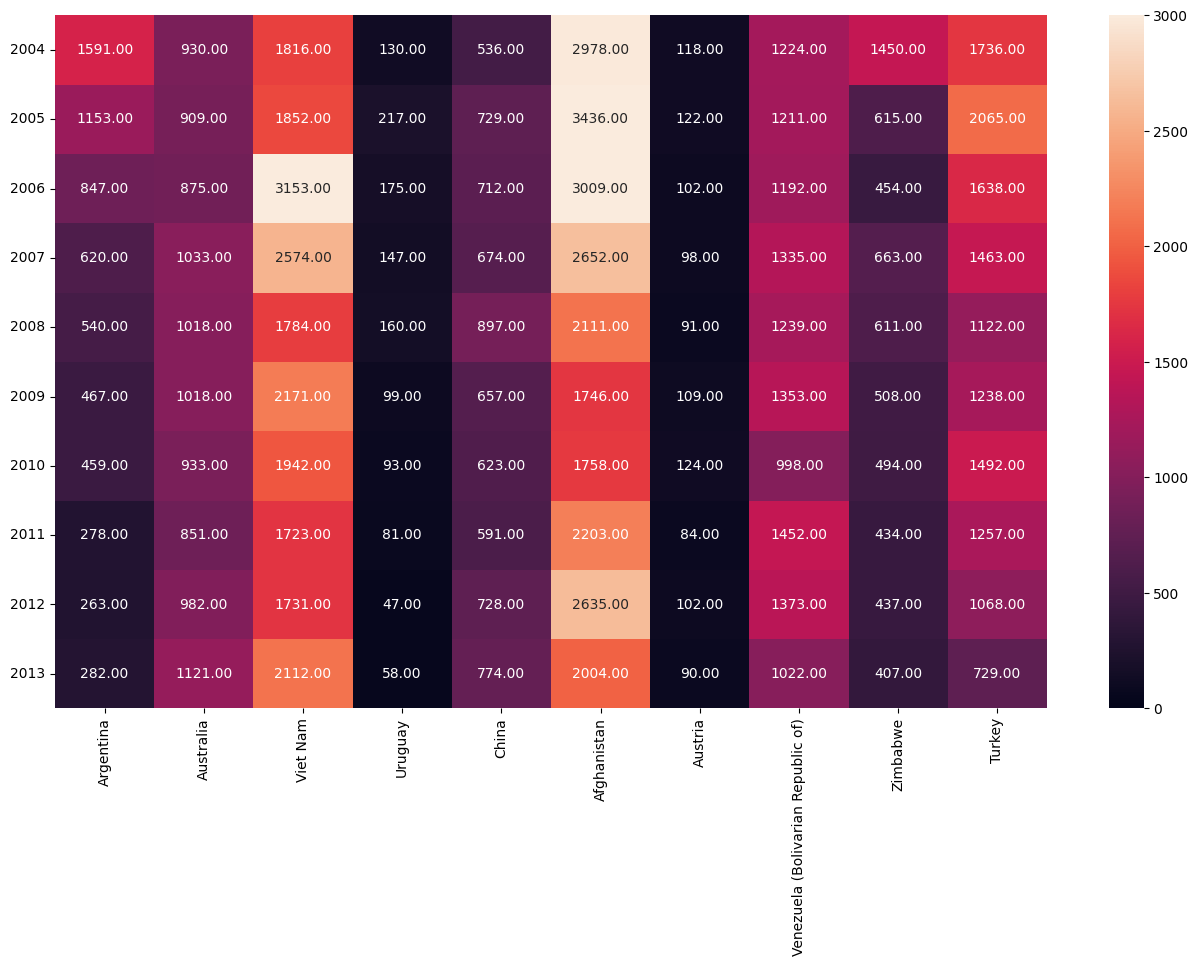

In [34]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(canada1, vmin = 0, vmax = 3000, annot = True, fmt = '.2f')
plt.yticks(rotation = 0)
plt.show()

In [38]:
#Plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import plot, iplot

In [41]:
#scatterplot
random_x = np.random.randint(1, 100, 50)
random_y = np.random.randint(1, 100, 50)

data = [go.Scatter(x = random_x, y = random_y, mode = 'markers')]

layout = go.Layout(xaxis = dict(showgrid = False, showline = False), yaxis = dict(showgrid = False, showline = False))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [42]:
#multiple data
x_values = np.linspace(0, 100, 100)
y_values = np.random.randn(100)

trace0 = go.Scatter(x = x_values, y = y_values, mode = 'markers', marker = dict(size = 7, 
                                                                               color = '#F4D03F',
                                                                               symbol = 'circle',
                                                                               line = dict(width = 1, color = '#0E8700')))

trace1 = go.Scatter(x = x_values, y = y_values - 5, mode = 'markers', marker = dict(size = 7, 
                                                                               color = '#A9DFBF',
                                                                               symbol = 'circle',
                                                                               line = dict(width = 1, color = '#0E8700')))

data = [trace0, trace1]

layout = go.Layout(xaxis = dict(showgrid = False, showline = False), yaxis = dict(showgrid = False, showline = False))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [44]:
insurance = pd.read_csv('/kaggle/input/insrnce1234/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [48]:
data = [go.Scatter(x = insurance.bmi, y = insurance.expenses, mode = 'markers', marker = dict(size = 7,
                                                                                             color = '#4ED700',
                                                                                             symbol = 'circle',
                                                                                             line = dict(width = 1,
                                                                                                        color = '#0E8700')))]
layout = go.Layout(title = 'Insurance', xaxis = dict(title = 'BMI', showgrid = False, showline = False),
                  yaxis = dict(title = 'Expenses', showgrid = False, showline = False))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [50]:
#Sigorta masrafı arttıkça baloncuklar büyüsün, plotly express
fig = px.scatter(insurance, x = insurance.bmi, y = insurance.expenses, color = 'smoker', size = insurance.expenses)

fig.update_layout(xaxis = dict(showgrid = False, showline = False),
                      yaxis = dict(showgrid = False, showline = False))

fig.show()

In [51]:
canada.head()

,Afghanistan,Albania,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Unknown
1980,16,1,0,0,1,0,368,0,702,234,...,128,0,0,103,1191,0,1,11,72,44000
1981,39,0,1,0,3,0,426,0,639,238,...,132,0,0,117,1829,0,2,17,114,18078
1982,39,0,0,0,6,0,626,0,484,201,...,146,0,0,174,2162,0,1,11,102,16904
1983,47,0,0,0,6,0,241,0,317,117,...,105,0,0,124,3404,0,6,7,44,13635
1984,71,0,0,0,4,42,237,0,317,127,...,90,0,0,142,7583,0,0,16,32,14855


In [53]:
#line plot
china = go.Scatter(x = canada.index.values, y = canada['China'], mode = 'lines', name = 'China')

turkey = go.Scatter(x = canada.index.values, y = canada['Turkey'], mode = 'lines', name = 'Turkey')

brazil = go.Scatter(x = canada.index.values, y = canada['Brazil'], mode = 'lines', name = 'Brazil')

layout = go.Layout(title = 'Immigrants', xaxis = dict(title = 'Year', showgrid = False, showline = False),
                  yaxis = dict(title = 'Number of Immigrants', showgrid = False, showline = False), 
                  paper_bgcolor = '#FFFDE7')

data = [china, turkey, brazil]

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [54]:
#barplot, plotly express

x = np.arange(1, 10)
y = np.arange(20, 110, 10)
fig = px.bar(x = x, y = y)

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()